In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

X, y = datasets.make_moons(noise = 0.15, random_state=666)

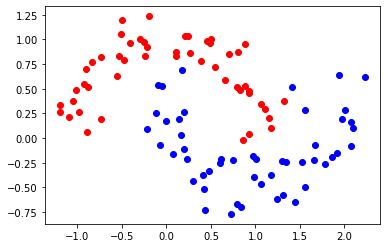

In [4]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

In [6]:
svc = RBFKernelSVC(gamma = 1.0)
svc.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=1.0))])

In [8]:
# 咱们先顶一个一个函数来画决策边界
def plot_decision_boundary(model, axis):
  
    s1 = np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100))
    s2 = np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)) 
    x0, x1 = np.meshgrid(
        s1, s2
    )
    r1 = x0.ravel()
    r2 = x1.ravel()
    X_new = np.c_[r1, r2]
    y_predict = model.predict(X_new)
    
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#ef9a9a', '#fff59d', '#90caf9'])
    
    plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)

<ipython-input-8-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


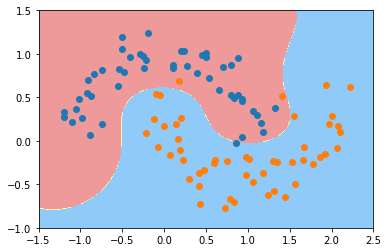

In [10]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0, 1])
plt.scatter(X[y==1,0], X[y==1, 1])
plt.show()

<ipython-input-8-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


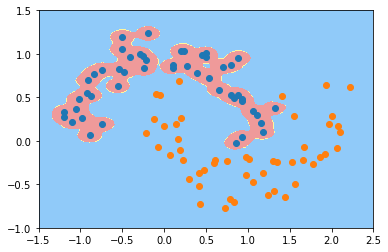

In [15]:
svc_gamma100 = RBFKernelSVC(gamma = 100)
svc_gamma100.fit(X, y)
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0, 1])
plt.scatter(X[y==1,0], X[y==1, 1])
plt.show()

<ipython-input-8-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


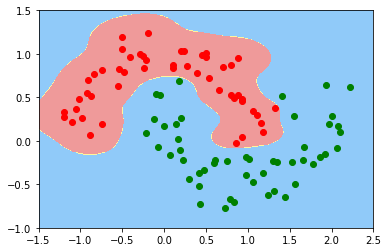

In [19]:
svc_gamma10 = RBFKernelSVC(gamma = 10)
svc_gamma10.fit(X, y)
plot_decision_boundary(svc_gamma10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0, 1], color='red')
plt.scatter(X[y==1,0], X[y==1, 1], color='green')
plt.show()

<ipython-input-8-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


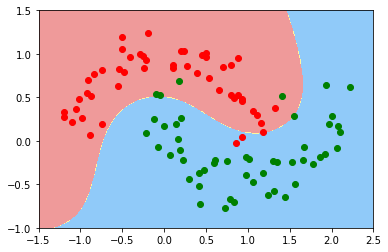

In [21]:
svc_gamma05 = RBFKernelSVC(gamma = 0.5)
svc_gamma05.fit(X, y)
plot_decision_boundary(svc_gamma05, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0, 1], color='red')
plt.scatter(X[y==1,0], X[y==1, 1], color='green')
plt.show()

<ipython-input-8-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


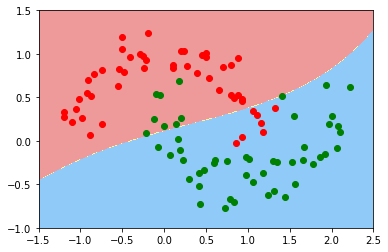

In [22]:
svc_gamma01 = RBFKernelSVC(gamma = 0.1)
svc_gamma01.fit(X, y)
plot_decision_boundary(svc_gamma01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0, 1], color='red')
plt.scatter(X[y==1,0], X[y==1, 1], color='green')
plt.show()

## 使用多项式核函数的SVM

In [29]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel="poly", degree = degree, C = C))
    ])

In [30]:
poly_kernel_svc = PolynomialKernelSVC(degree = 3)
poly_kernel_svc.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('kernelSVC', SVC(kernel='poly'))])

<ipython-input-25-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


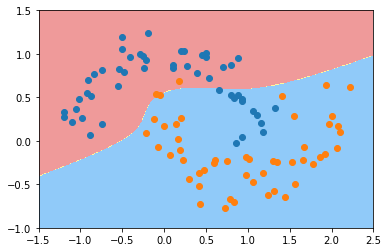

In [32]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0, 1])
plt.scatter(X[y==1,0], X[y==1, 1])
plt.show()

In [14]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01)

<ipython-input-12-8e497f1e0bad>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)


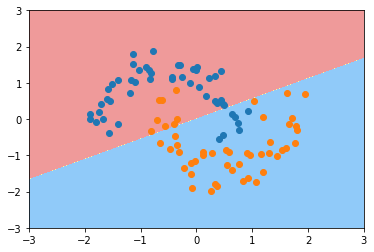

In [15]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1,0], X_standard[y==1, 1])
plt.show()

In [16]:
svc.coef_

NameError: name 'svc' is not defined

In [ ]:
svc.intercept_

In [ ]:
# 咱们先顶一个一个函数来画决策边界
def plot_decision_boundary(model, axis):
  
    s1 = np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100))
    s2 = np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)) 
    x0, x1 = np.meshgrid(
        s1, s2
    )
    r1 = x0.ravel()
    r2 = x1.ravel()
    X_new = np.c_[r1, r2]
    y_predict = model.predict(X_new)
    
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#ef9a9a', '#fff59d', '#90caf9'])
    
    plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0 * w0 + w1 * w1 + b = 0
    # => x1 =  -w0 / w1 * x0 - b / w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0] / w[1] * plot_x - b/w[1] + 1 / w[1]
    down_y = -w[0] / w[1] * plot_x - b/w[1] - 1 / w[1] 
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color = 'b')
    plt.plot(plot_x[down_index], down_y[down_index], color = 'b')

In [ ]:
plot_decision_boundary(svc,  axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])
plt.scatter(X_standard[y==2, 0], X_standard[y==2, 1])
plt.show()